## One_Way ANOVA hypothesis test

In the dataset, each row corresponds to an independent marketing promotion, where the business uses TV, social media, radio, and influencer promotions to increase sales. Stakeholders want to know if sales are significantly different among various TV and influencer promotion types.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import math

In [2]:
mktg_raw = pd.read_csv('./raw_data/marketing_sales_data.csv')
mktg_raw.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


### Data exploration

C:\Users\andre\AppData\Local\Temp\ipykernel_8736\379825314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_mktg['log_sales'] = mktg_raw.apply( lambda mktg: math.log(mktg['Sales']),axis=1)


       TV       Sales  log_sales
0     Low   90.054222   4.500412
1  Medium  222.741668   5.406013
2     Low  102.774790   4.632540
3    High  328.239378   5.793743
4    High  351.807328   5.863084


<Axes: xlabel='TV', ylabel='Sales'>

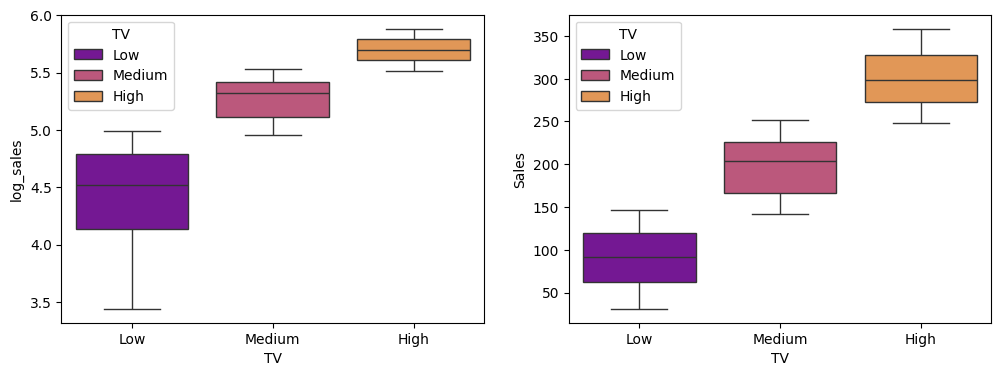

In [3]:
# Since I want to know the impact over TV and Influencer on Sales

# TV checks
tv_mktg = mktg_raw[['TV','Sales']]
tv_mktg['log_sales'] = mktg_raw.apply( lambda mktg: math.log(mktg['Sales']),axis=1)

print(tv_mktg.head())

fig , axes = plt.subplots(1,2,figsize =(12,4))
sns.boxplot(
    data = tv_mktg,
    x = 'TV',
    y = 'log_sales',
    hue = 'TV',
    palette= 'plasma',
    ax = axes[0]
)

sns.boxplot(
    data = tv_mktg,
    x = 'TV',
    y = 'Sales',
    hue = 'TV',
    palette= 'plasma',
    ax = axes[1]
)

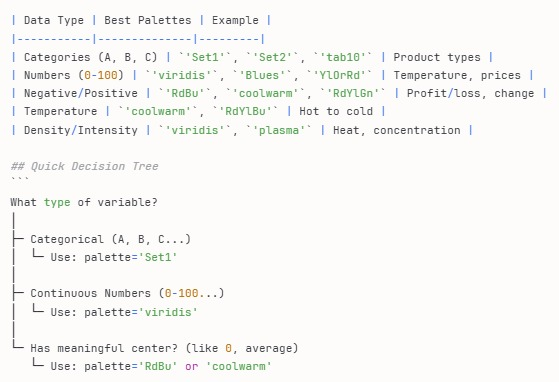

  Influencer       Sales  log_sales
0      Micro   90.054222   4.500412
1      Macro  222.741668   5.406013
2       Mega  102.774790   4.632540
3      Micro  328.239378   5.793743
4       Mega  351.807328   5.863084


C:\Users\andre\AppData\Local\Temp\ipykernel_8736\2816580880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  influencer_mktg['log_sales'] = mktg_raw.apply( lambda mktg: math.log(mktg['Sales']),axis=1)


<Axes: xlabel='Influencer', ylabel='Sales'>

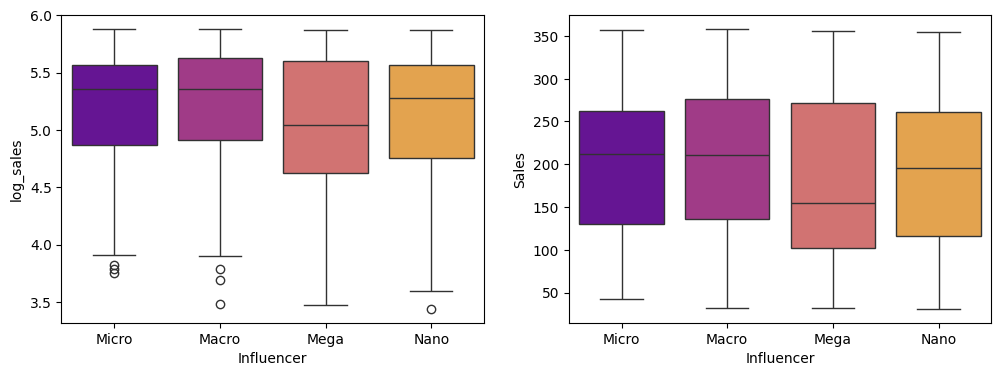

In [4]:
# Since I want to know the impact over TV and Influencer on Sales

# Influencer checks
influencer_mktg = mktg_raw[['Influencer','Sales']]
influencer_mktg['log_sales'] = mktg_raw.apply( lambda mktg: math.log(mktg['Sales']),axis=1)

print(influencer_mktg.head())

fig , axes = plt.subplots(1,2,figsize =(12,4))
sns.boxplot(
    data = influencer_mktg,
    x = 'Influencer',
    y = 'log_sales',
    hue = 'Influencer',
    palette= 'plasma',
    ax = axes[0]
)

sns.boxplot(
    data = influencer_mktg,
    x = 'Influencer',
    y = 'Sales',
    hue = 'Influencer',
    palette= 'plasma',
    ax = axes[1]
)

In [5]:
mktg_raw.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [6]:
tv_mktg.isna().sum()

TV           1
Sales        1
log_sales    1
dtype: int64

In [7]:
tv_mktg.dropna(inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_8736\2489412073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_mktg.dropna(inplace=True)


In [8]:
tv_mktg

,TV,Sales,log_sales
0,Low,90.054222,4.500412
1,Medium,222.741668,5.406013
2,Low,102.774790,4.632540
3,High,328.239378,5.793743
4,High,351.807328,5.863084
...,...,...,...
567,High,302.887998,5.713363
568,Medium,232.555023,5.449127
569,Low,73.888838,4.302562
570,Low,121.949570,4.803608


In [9]:
influencer_mktg.dropna(inplace=True)

infl_sales_model = ols(formula='log_sales ~ C(Influencer)',data = influencer_mktg).fit()
infl_sales_model.summary()

C:\Users\andre\AppData\Local\Temp\ipykernel_8736\644203649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  influencer_mktg.dropna(inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.063
Date:                Mon, 26 Jan 2026   Prob (F-statistic):             0.0277
Time:                        16:50:43   Log-Likelihood:                -497.47
No. Observations:                 571   AIC:                             1003.
Df Residuals:                     567   BIC:                             1020.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.2031      0.051    102.623      0.000       5.104       5.303
C(Influencer)[T.Mega]     -0.1902      0.070     -2.727      0.007      -0.327      -0.053
C(Influencer)[T.Micro]    -0.0260      0.070     -0.371      0.710      -0.163       0.111
C(Influencer)[T.Nano]     -0.0984      0.070     -1.413      0.158      -0.235       0.038
==============================================================================
Omnibus:                       48.051   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.866
Skew:                          -0.782   Prob(JB):                     1.65e-13
Kurtosis:                       2.834   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared and the Adj. R-squared are too low values, meaning that there is no linear relation
so build a model to predict the sales based only on influencer doesn't apply for this case of study

In [10]:
tv_sales_model = ols(formula='log_sales ~ C(TV)', data= tv_mktg).fit()
tv_sales_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1112.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):          6.01e-197
Time:                        16:50:43   Log-Likelihood:                -46.715
No. Observations:                 570   AIC:                             99.43
Df Residuals:                     567   BIC:                             112.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.7004      0.020    287.184      0.000       5.661       5.739
C(TV)[T.Low]       -1.2560      0.027    -45.985      0.000      -1.310      -1.202
C(TV)[T.Medium]    -0.4211      0.027    -15.416      0.000      -0.475      -0.367
==============================================================================
Omnibus:                       72.789   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.065
Skew:                          -0.809   Prob(JB):                     5.14e-27
Kurtosis:                       4.574   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
tv_sales_model = ols(formula='Sales ~ C(TV)', data= tv_mktg).fit()
tv_sales_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1981.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):          1.52e-256
Time:                        16:50:43   Log-Likelihood:                -2783.4
No. Observations:                 570   AIC:                             5573.
Df Residuals:                     567   BIC:                             5586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.415    124.450      0.000     295.786     305.273
C(TV)[T.Low]     -208.8827      3.323    -62.862      0.000    -215.409    -202.356
C(TV)[T.Medium]  -101.5061      3.323    -30.548      0.000    -108.033     -94.979
==============================================================================
Omnibus:                      445.741   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.711
Skew:                          -0.042   Prob(JB):                     1.76e-08
Kurtosis:                       1.777   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f(sales) = [(TV_low[0/1])*(-208.8827)] + [(TV_Medium[0/1])*(-101.5061)] + 300.5296

In [12]:
def manual_predictions(row):
    
    if row['TV'] == 'High':
        low_index = 0
        med_index = 0
    elif row['TV'] == 'Medium':
        low_index = 0
        med_index = 1
    elif row['TV'] == 'Low':
        low_index = 1
        med_index = 0

    return (low_index*(-208.8827)) + (med_index*(-101.5061)) + 300.5296

tv_mktg['manual_sales'] = tv_mktg.apply(manual_predictions,axis=1)
tv_mktg['manual_resid'] = tv_mktg['Sales'] - tv_mktg['manual_sales']

tv_mktg['predictions'] = tv_sales_model.predict(tv_mktg['TV'])
tv_mktg['residuals'] = tv_sales_model.resid
tv_mktg

C:\Users\andre\AppData\Local\Temp\ipykernel_8736\2655205866.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_mktg['manual_sales'] = tv_mktg.apply(manual_predictions,axis=1)
C:\Users\andre\AppData\Local\Temp\ipykernel_8736\2655205866.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_mktg['manual_resid'] = tv_mktg['Sales'] - tv_mktg['manual_sales']
C:\Users\andre\AppData\Local\Temp\ipykernel_8736\2655205866.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,TV,Sales,log_sales,manual_sales,manual_resid,predictions,residuals
0,Low,90.054222,4.500412,91.6469,-1.592678,91.646843,-1.592621
1,Medium,222.741668,5.406013,199.0235,23.718168,199.023461,23.718207
2,Low,102.774790,4.632540,91.6469,11.127890,91.646843,11.127948
3,High,328.239378,5.793743,300.5296,27.709778,300.529591,27.709787
4,High,351.807328,5.863084,300.5296,51.277728,300.529591,51.277737
...,...,...,...,...,...,...,...
567,High,302.887998,5.713363,300.5296,2.358398,300.529591,2.358407
568,Medium,232.555023,5.449127,199.0235,33.531523,199.023461,33.531563
569,Low,73.888838,4.302562,91.6469,-17.758062,91.646843,-17.758005
570,Low,121.949570,4.803608,91.6469,30.302670,91.646843,30.302727


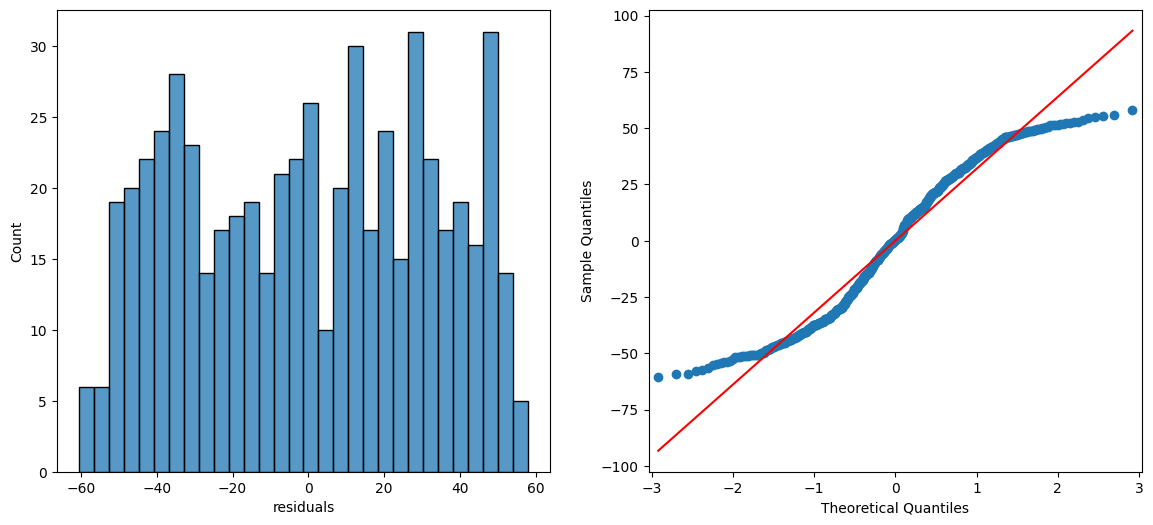

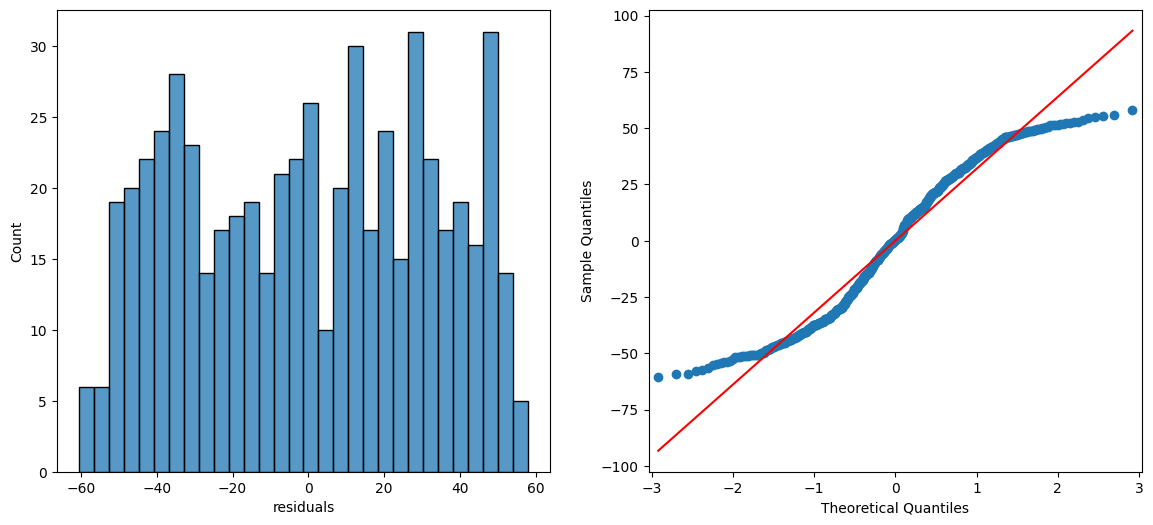

In [16]:
fig, axes = plt.subplots(1,2,figsize=(14,6))

sns.histplot(
    tv_mktg['residuals'],
    bins= 30,
    ax=axes[0]
)

sm.qqplot(
    tv_mktg['residuals'],
    ax = axes[1],
    line = 's'
)

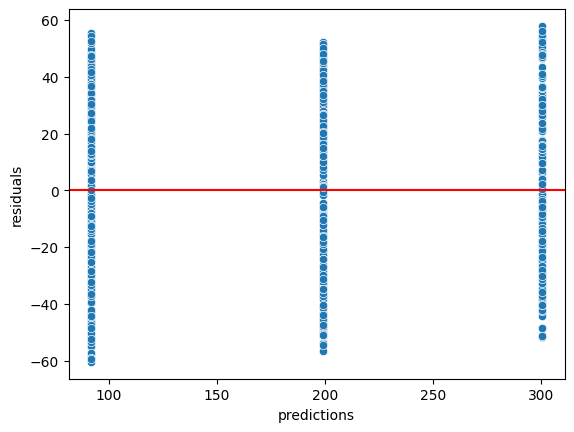

In [21]:
sns.scatterplot(
    data = tv_mktg,
    x='predictions',
    y='residuals'
)

plt.axhline(0,color='red')

## Perform ANOVA one_way

In [22]:
sm.stats.anova_lm(tv_sales_model,typ= 2)

,sum_sq,df,F,PR(>F)
C(TV),4.065806e+06,2.0,1980.694879,1.516108e-256
Residual,5.819452e+05,567.0,NaN,NaN


The F-test statistic is 1980.7 and the p-value is  1.52∗10−256 (i.e., very small). Because the p-value is less than 0.05, I would reject the null hypothesis that there is no difference in Sales based on the TV promotion budge

The results of the one-way ANOVA test indicate that the null hypothesis can be rejected in favor of the alternative hypothesis. There is a statistically significant difference in Sales among TV groups.

***
## Perform an ANOVA Post hoc Test

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_oneway = pairwise_tukeyhsd(endog=tv_mktg['Sales'],groups=tv_mktg['TV'])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8827,0.0,-216.6911,-201.0744,True
High,Medium,-101.5061,0.0,-109.3145,-93.6978,True
Low,Medium,107.3766,0.0,99.7912,114.962,True
